<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab07_interpolacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Laboratorio metodos computacionales, 
# Interpolacion





# 1. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta) $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si $u$ es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


0. Establezca las siguietnes condiciones inciales.

```
#Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u,g)  #Parametros en tupla.

```



1. Defina dos funciones, una para x y otra para y. 

```

#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  x = #escriba aca la expresión
  return x

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):


  y = #escriba aca la expresión
  return y 

```

2. Construya un diccionario con las claves "X", "Y", "Tiempo"

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 registros para el intervalo de tiempo elegido.


4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).


5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 90 grados cada 5 grados.

7. Realice una interpolacion de R como función de theta.











Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

In [134]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import math
from scipy import optimize
from scipy.optimize import newton
from scipy import interpolate
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline

In [135]:
# Parametros iniciales

vo = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = vo/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, vo, b, u,g)  #Parametros en tupla.

In [136]:
def pos_x(t, vo, theta0, u, alpha, b, g  ):
  t1 = u*np.cos(alpha)*t  
  t2 = 1./b*(vo*np.cos(theta0)-u*np.cos(alpha))  
  t3 = (1-np.exp(-b*t))
  return t1 + t2 * t3


def pos_y(t, vo, theta0, u, alpha, b, g  ):
  t1 = (g/b + vo*np.sin(theta0) - u* np.sin(alpha) )
  t2 = (1-np.exp(-b*t)) 
  t3 = (g/b - u*np.sin(alpha))*t 
  return 1./b * t1 * t2 - t3

In [137]:
t = np.linspace(0, 8.5, 1000)
Params = (vo, theta, u, alpha, b , g)  #Parametros en tupla.
x = pos_x(t, *Params)
y = pos_y(t, *Params)

In [138]:
dicc = {"x":x,"y":y ,"t":t}
df = pd.DataFrame(dicc)

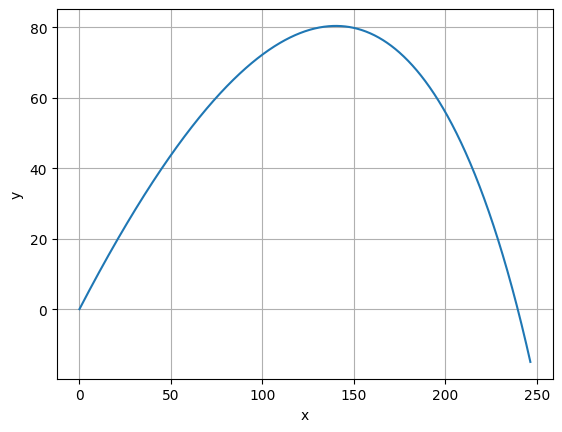

In [139]:
plt.plot(df.x, df.y)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

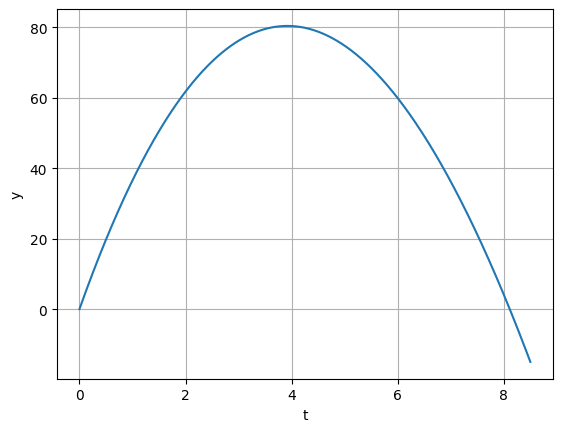

In [140]:
plt.plot(df.t, df.y)
plt.xlabel("t")
plt.ylabel("y")
plt.grid()

In [141]:
tv = newton(pos_y, 6.5, args=Params)
tv

8.111627022095584

In [142]:
pos_x(tv, *Params)

239.60614945520726

# Generalizacion

In [143]:
np.arange(5, 85, 5)

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])

In [144]:
theta = np.deg2rad(np.arange(5, 80, 5)) #Angulo de lanzamiento
theta

array([0.08726646, 0.17453293, 0.26179939, 0.34906585, 0.43633231,
       0.52359878, 0.61086524, 0.6981317 , 0.78539816, 0.87266463,
       0.95993109, 1.04719755, 1.13446401, 1.22173048, 1.30899694])

In [145]:
Rmax = np.zeros(len(theta))
for i, te in enumerate(theta):
  Params = (vo, te, u, alpha, b , g)  #Parametros en tupla.
  tv = newton(pos_y, 6.5, args = Params)
  Rmax[i] = pos_x(tv, *Params)
  #print(tv,pos_x(tv, *Params))

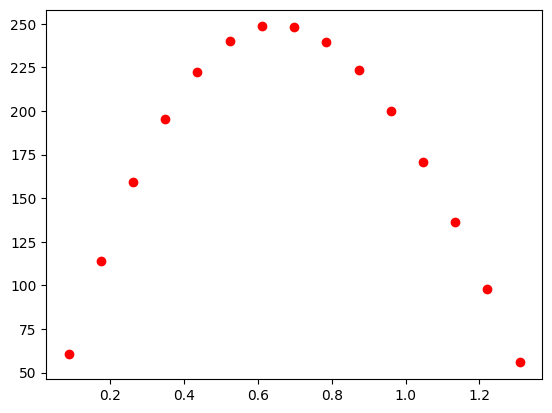

In [146]:
# Alcance maximo como funcion de theta
plt.plot(theta, Rmax,"ro" )




# 2.0  Interpolación lagrange

Consideremos la función: 
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$. 
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.
 
 Para este numeral, emplee que: 
 
 
La cota del  error , viene dado por: 
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}, emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

In [147]:
#Ayuda: 

import sympy as sp # Cargamos sympy como sp
import numpy as np
from scipy.interpolate import lagrange
import matplotlib.pylab as plt

In [148]:
f_s = lambda x: 1/(1+25*x**2)

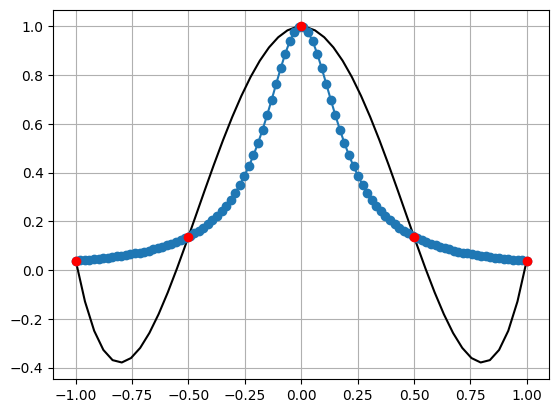

In [149]:
x=np.linspace(-1,1,100)

#Puntos a interpolar
N=5
x_=np.linspace(-1,1,N)

#interpolación
poly=lagrange(x_,f_s(x_))

#Valores de x con los que se grafica la interpolación
x_p=np.linspace(np.min(x_),np.max(x_))

plt.plot(x_p,poly(x_p),"k")
plt.plot(x,f_s(x),'o-')
plt.plot(x_,f_s(x_),'ro')
plt.grid()

In [150]:
def interpolacion(N):
  n=N+1
  x_=np.linspace(-1,1,n)

  #interpolación
  poly=lagrange(x_,f_s(x_))

  #Valores de x con los que se grafica la interpolación
  x_p=np.linspace(np.min(x_),np.max(x_))
  return x_p,poly


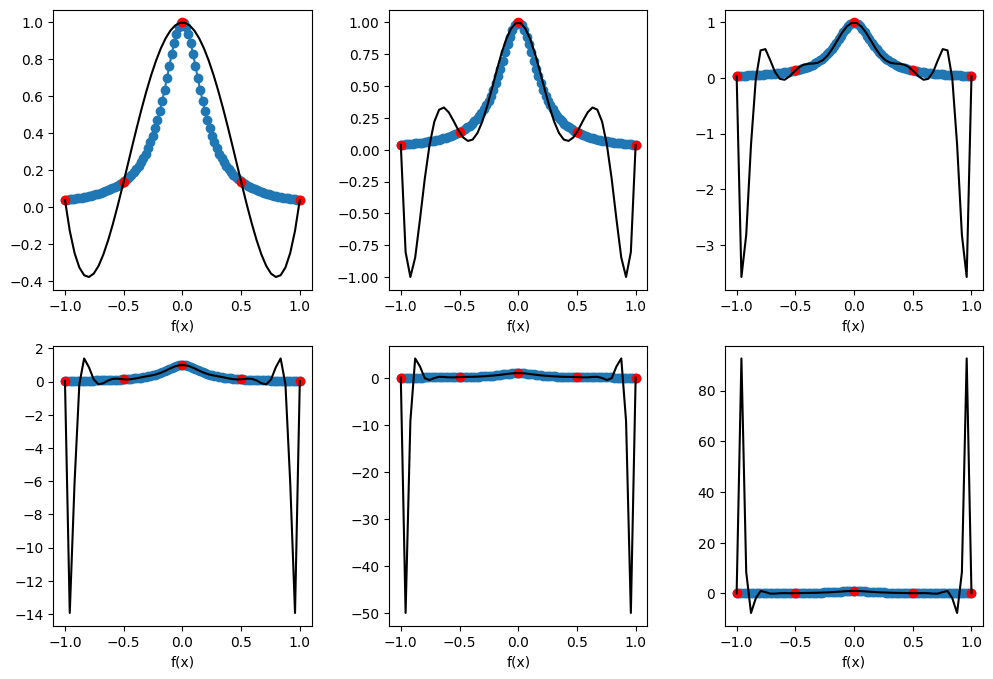

In [151]:
NN=[4,8,12,16,20,22]

i=0
fig,axs=plt.subplots(figsize=(12,8),nrows=2,ncols=3)

for n_ in NN:
  ax=axs.flatten()
  ax[i].plot(x,f_s(x),'o-')
  ax[i].plot(x_,f_s(x_),'ro')
  N=n_
  xx,P=interpolacion(N)
  ax[i].plot(xx,P(xx),"k")
  ax[i].set_xlabel('x')
  ax[i].set_xlabel('f(x)')
  i=i+1

fig.subplots_adjust(wspace=0.3)
fig.subplots_adjust(hspace=0.2)

\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}

In [152]:
N=4
xx,P=interpolacion(N)

In [153]:
f_s = lambda x: 1/(1+25*x**2)
x = sp.symbols("x") # x será una variable simbólica
f_s(x)
f5 = sp.diff(f_s(x),x,N+1)
print(f5)
fxn5 = sp.lambdify(x,f5,'numpy') #numpy funcion

3750000*x*(-10000*x**4/(25*x**2 + 1)**2 + 400*x**2/(25*x**2 + 1) - 3)/(25*x**2 + 1)**4


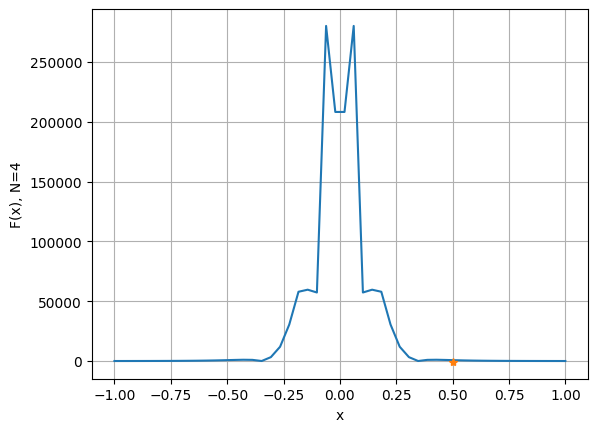

In [154]:
x_ = np.linspace(-1, 1, 100)

plt.figure()
plt.plot(xx,abs(fxn5(xx)))
plt.plot(0.5,fxn5(0.5),'*')
plt.xlabel("x")
plt.ylabel("F(x)")
plt.grid()
plt.show()

In [155]:
x_ = np.linspace(-1, 1, N+1)
x_

array([-1. , -0.5,  0. ,  0.5,  1. ])

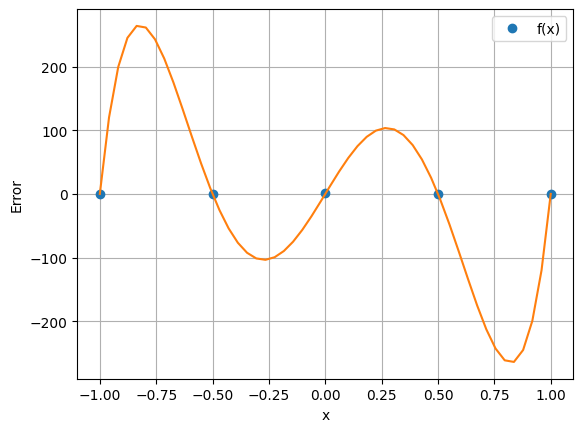

In [156]:
plt.plot(x_,f_s(x_),"o",label="f(x)")
plt.plot(xx,280238.95743385755*((xx-x_[0])*(xx-x_[1])*(xx-x_[2])*(xx-x_[3])*(xx-x_[4]))/math.factorial(N+1))
plt.xlabel("x")
plt.ylabel("Error")
plt.legend()
plt.grid()
plt.show()


# 3.  Interpolación Hermite

Consideremos la función: 
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$. 
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.
 
 Para este numeral, emplee que: 
 
 
La cota del  error , viene dado por: 

$$
  f(x)-p_{2n+1}(x)
  = \frac{f^{2n+2}(\xi)}{(2n+2)!} (x-x_0)^2(x-x_1)^2(x-x_2)^2,
$$





emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5


In [185]:
def f_s(x):
  return 1/(1+25*x**2)
x=sp.Symbol("x")
f_s(x)
f_p = sp.diff(f_s(x), x, 1)
f_p

-50*x/(25*x**2 + 1)**2

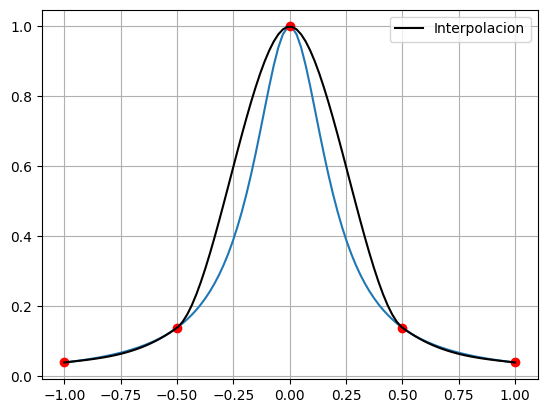

In [186]:
fun = sp.lambdify(x,f_s(x),'numpy') #numpy funcion
funp = sp.lambdify(x,f_p,'numpy') #numpy funcion

xx=np.linspace(-1,1,100)
plt.plot(xx,fun(xx))# Graficacion de la funcion

#INterpolacion
N=4
x_= np.linspace(-1,1,N+1)
plt.plot(x_,fun(x_),"ro")# Graficacion de la funcion

h = interpolate.CubicHermiteSpline(x_,fun(x_),funp(x_))
plt.plot(xx,h(xx),"k-",label="Interpolacion")
plt.legend()
plt.grid()

<!-- 
$$
  f(x)-p_{2n+1}(x)
  = \frac{f^{2n+2}(\xi)}{(2n+2)!} (x-x_0)^2(x-x_1)^2(x-x_2)^2*(x-x_3)^2*(x-x_4)^2,
$$ -->

Error en la interpolacion de Hermite

$$f(x) - P(x) = \frac{f^{(2n)}(\xi)}{(2n)!} \prod_{i=0}^{n-1} (x-x_i)^2$$

Para 5 puntos tenemos que 2n+1=5, n=2


29697746435679.55


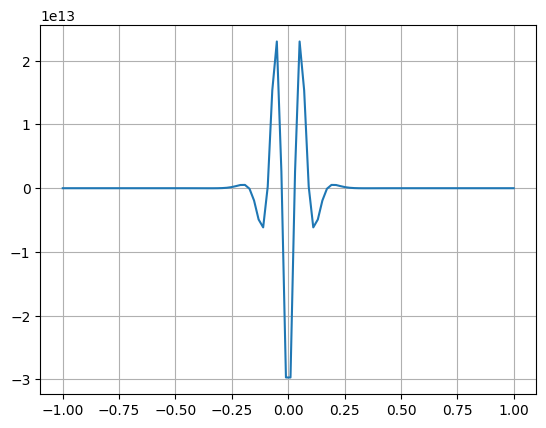

In [187]:
f_s = lambda x: 1/(1+25*x**2)
x=sp.Symbol("x")
f_p = sp.diff(f_s(x), x, 10)
funP_Error = sp.lambdify(x,f_p,'numpy') #numpy funcion
plt.plot(xx,funP_Error(xx))
plt.grid()
m=np.max(abs(funP_Error(xx)))
print(m)

In [160]:
E=(m/(math.factorial(10)))*(xx-x_[0])**2*(xx-x_[1])**2*(xx-x_[2])**2*(xx-x_[3])**2*(xx-x_[4])**2
E

array([0.00000000e+00, 6.33558303e+03, 2.12587467e+04, 3.99105409e+04,
       5.88609569e+04, 7.58224766e+04, 8.94052949e+04, 9.89098082e+04,
       1.04152287e+05, 1.05319965e+05, 1.02852057e+05, 9.73435325e+04,
       8.94686917e+04, 7.99218868e+04, 6.93729452e+04, 5.84350868e+04,
       4.76433403e+04, 3.74416629e+04, 2.81771606e+04, 2.00999780e+04,
       1.33675982e+04, 8.05244463e+03, 4.15182127e+03, 1.59936252e+03,
       2.77286357e+02, 2.88586882e+01, 6.70581047e+02, 2.00370920e+03,
       3.82479664e+03, 5.93503518e+03, 8.14823495e+03, 1.02973483e+04,
       1.22394970e+04, 1.38595112e+04, 1.50720266e+04, 1.58222254e+04,
       1.60853322e+04, 1.58649993e+04, 1.51907353e+04, 1.41145409e+04,
       1.27069268e+04, 1.10524881e+04, 9.24521315e+03, 7.38369811e+03,
       5.56643073e+03, 3.88729808e+03, 2.43145780e+03, 1.27169785e+03,
       4.65391394e+02, 5.21347026e+01, 5.21347026e+01, 4.65391394e+02,
       1.27169785e+03, 2.43145780e+03, 3.88729808e+03, 5.56643073e+03,
      

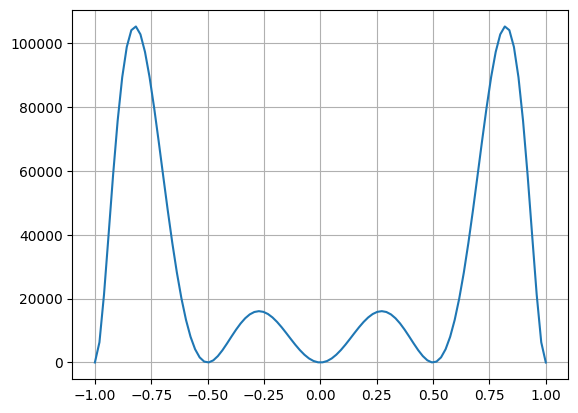

In [188]:
plt.plot(xx,E)
plt.grid()

# 4. Spline Cúbico

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).




Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`) 

In [162]:
from PIL import Image
import requests
from io import BytesIO

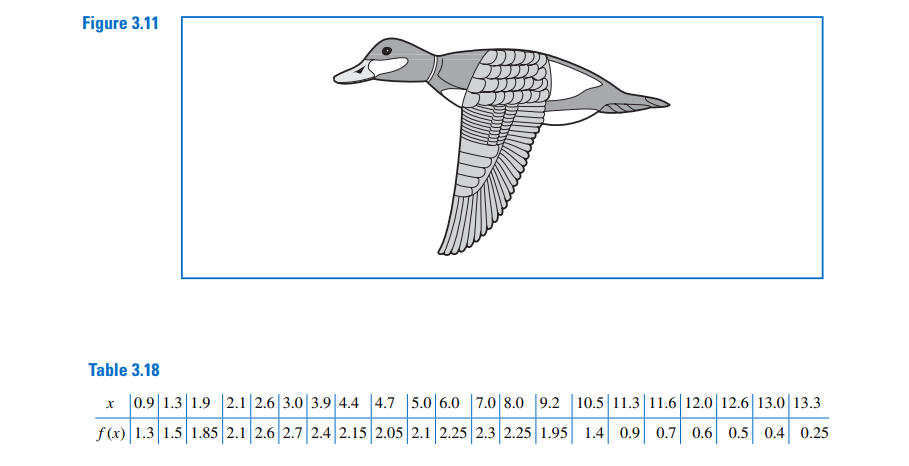

In [163]:
url = 'https://raw.githubusercontent.com/hernansalinas/autogrades/main/Laboratorios_Taller/img/paloma.png'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

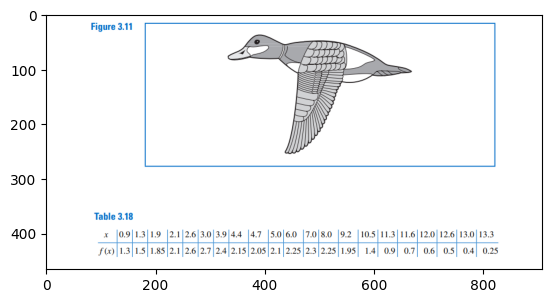

In [164]:
pato=np.array(img)
plt.imshow(pato)

2. Definir una lista de puntos, $x_i$,$y_i$ de la paloma.

In [165]:
x=np.array([0.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3])
fx=np.array([1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25])

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.


In [166]:
P=lagrange(x,fx)
print(P)

            20             19             18             17
-3.075e-11 x  + 4.279e-09 x  - 2.773e-07 x  + 1.111e-05 x 
              16            15           14         13         12
 - 0.0003082 x  + 0.006286 x  - 0.09769 x  + 1.183 x  - 11.32 x 
          11         10        9        8             7             6
 + 86.25 x  - 525.8 x  + 2564 x - 9969 x + 3.068e+04 x - 7.387e+04 x
              5             4           3             2
 + 1.368e+05 x - 1.899e+05 x + 1.9e+05 x - 1.287e+05 x + 5.246e+04 x - 9653


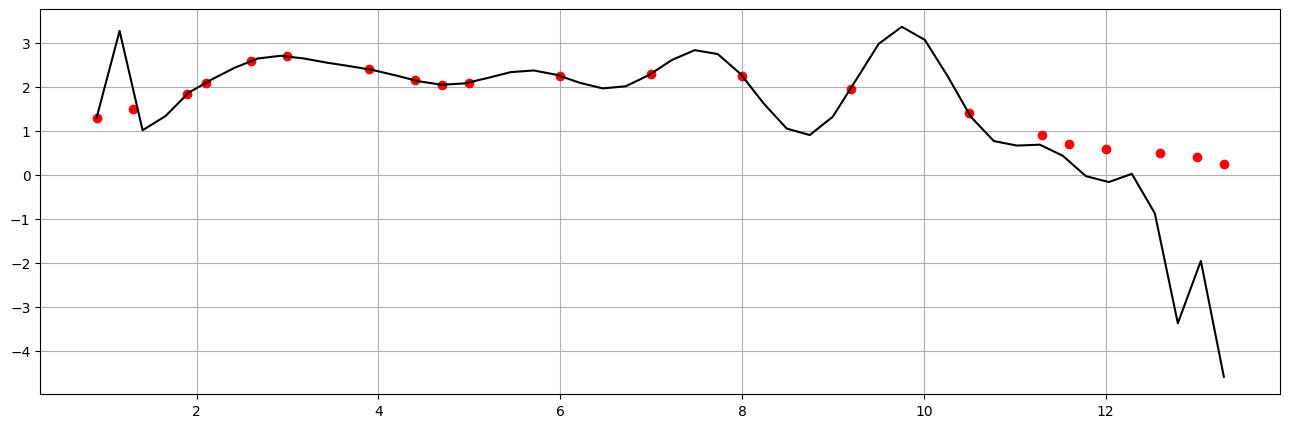

In [167]:
plt.figure(figsize=(16,5))
plt.plot(x,fx,'ro')
x_=np.linspace(np.min(x),np.max(x))
plt.plot(x_,P(x_),'k')
plt.grid()

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`)

In [168]:
P_c=CubicSpline(x,fx)

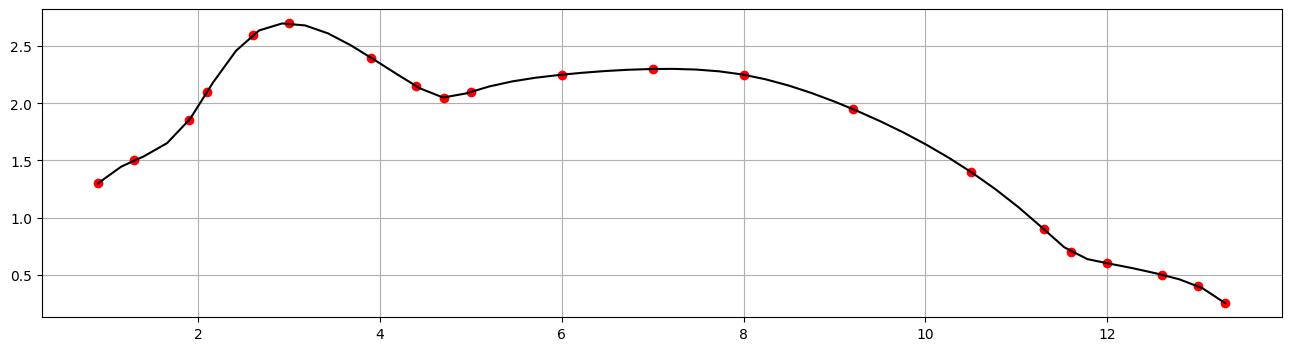

In [169]:
x_=np.linspace(np.min(x),np.max(x))
plt.figure(figsize=(16,4))
plt.plot(x,fx,'ro')
plt.plot(x_,P_c(x_),'k')
plt.grid()

5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?


En el caso de la interpolación por polinomios de Lagrange, estas oscilaciones se producen debido al fenómeno de Runge, que es un resultado teórico que muestra que, en general, los polinomios de interpolación de alta orden pueden oscilar violentamente entre los nodos de interpolación si la función a interpolar es suficientemente complicada. Este fenómeno se acentúa a medida que aumenta el número de nodos de interpolación y puede resultar en una mala aproximación de la función a interpolarse.

Por otro lado, las oscilaciones en las interpolaciones por spline cúbico pueden ser causadas por varios factores, como la elección inadecuada de los puntos de interpolación, la elección del grado del spline o la complejidad de la función a interpolar. En general, los splines cúbicos son menos propensos a oscilar que los polinomios de Lagrange, pero aún pueden presentar oscilaciones si los datos tienen irregularidades o si hay cambios bruscos en la función a interpolar.

En resumen, ambas técnicas de interpolación pueden presentar oscilaciones debido a diferentes factores, y la elección de la técnica de interpolación adecuada dependerá de la naturaleza de los datos y de la función a interpolar. En algunos casos, puede ser necesario experimentar con diferentes técnicas de interpolación para encontrar la que mejor se adapte a los datos y a la función a interpolar.


# 5.0 Ejercicios de Repaso

 En la teoria de campo medio, La magnetización como función de la temperatura de un material magnético  puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde m y T son la magnetizacion y temperatura reducida respectivamente

Para T = 0.5, determine:

a. La magnetización reducida empleando el metodo de la secante(Muestre su resultado con 4 cifras)


In [170]:
def f_m(m,T):
  return np.tanh(m/T)-m

#Con T=0.5
def f_t(x):
  return np.tanh(x/0.5)-x

In [171]:
r_1 = optimize.newton(f_m, 0.1, args=(0.5,), tol=1e-4)
print(r_1)

6.372513913141617e-16


In [172]:
r_2 = optimize.newton(f_m, -1, args=(0.5,), tol=1e-4)
print(r_2)

-0.9575040262209712


In [173]:
r_3 = optimize.newton(f_m, 1, args=(0.5,), tol=1e-4)
print(r_3)

0.9575040262209712


In [174]:
print('Las raices halladas por secante son:',r_1.round(decimals=4),',',r_2.round(decimals=4),',',r_3.round(decimals=4))

Las raices halladas por secante son: 0.0 , -0.9575 , 0.9575


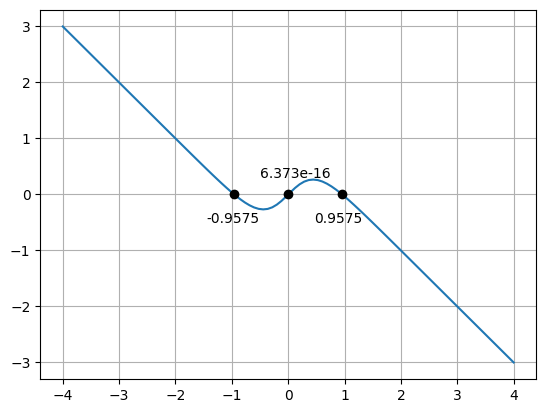

In [194]:
x=np.linspace(-4, 4, 100)
y= f_t(x)
plt.plot(x, y)
plt.plot(r_1,0,'ko')
plt.text(r_1-0.5,0.3, f'{r_1:.4}')
plt.plot(r_2,0,'ko')
plt.text(r_2-0.5,-0.5, f'{r_2:.4}')
plt.plot(r_3,0,'ko')
plt.text(r_3-0.5,-0.5, f'{r_3:.4}')
plt.grid()

b. Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

In [176]:
def g(x):
  return x-f_t(x)

In [177]:
ra_1=optimize.fixed_point(g, 0.01)
ra_2=optimize.fixed_point(g, 1)
ra_3=optimize.fixed_point(g, -1)

print('Las raices halladas por punto fijo son:', ra_1,',',ra_2.round(decimals=4),',',ra_3.round(decimals=4))

Las raices halladas por punto fijo son: 0.0 , 0.9575 , -0.9575


c. Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

In [178]:
T = np.linspace(0.1,0.99,100)

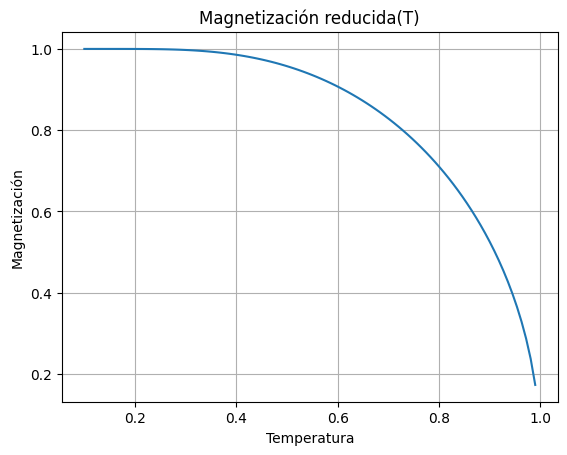

In [179]:
magnet = []

# Método de la secante para cada valor de T:
for t in T:
  m = optimize.newton(f_m, 0.5, args=(t,))
  magnet.append(m)
  
plt.plot(T, magnet)
plt.title('Magnetización reducida(T)')
plt.xlabel('Temperatura')
plt.ylabel('Magnetización')
plt.grid()
plt.show()

e. Para los 100 puntos anteriores, emplee el metodo de interpolación de lagrange y cubic-spline. Realizar una gráfica mostrando los puntos y el polinomio de interpolación para cada unos de los metodos. ¿Que puede concluir de los metodos?

In [180]:
m = np.array(magnet)

poly_l = lagrange(T, m)
print(poly_l)

           99             98             97             96
-8.25e+61 x  + 4.509e+63 x  - 1.182e+65 x  + 2.079e+66 x 
              95             94             93             92
 - 2.687e+67 x  + 2.802e+68 x  - 2.366e+69 x  + 1.675e+70 x 
              91             90           89             88
 - 1.032e+71 x  + 5.618e+71 x  - 2.7e+72 x  + 1.164e+73 x 
              87            86             85             84
 - 4.527e+73 x  + 1.59e+74 x  - 5.169e+74 x  + 1.558e+75 x 
              83             82             81             80
 - 4.296e+75 x  + 1.104e+76 x  - 2.621e+76 x  + 5.829e+76 x 
              79             78             77             76
 - 1.216e+77 x  + 2.392e+77 x  - 4.425e+77 x  + 7.525e+77 x 
              75             74            73             72
 - 1.227e+78 x  + 1.857e+78 x  - 2.71e+78 x  + 3.772e+78 x 
              71             70             69             68
 - 4.906e+78 x  + 6.157e+78 x  - 7.246e+78 x  + 8.168e+78 x 
              67           66 

In [181]:
poly_s = CubicSpline(T, m)
print(poly_s)

In [182]:
ma_l = poly_l(T)
ma_s= poly_s(T)

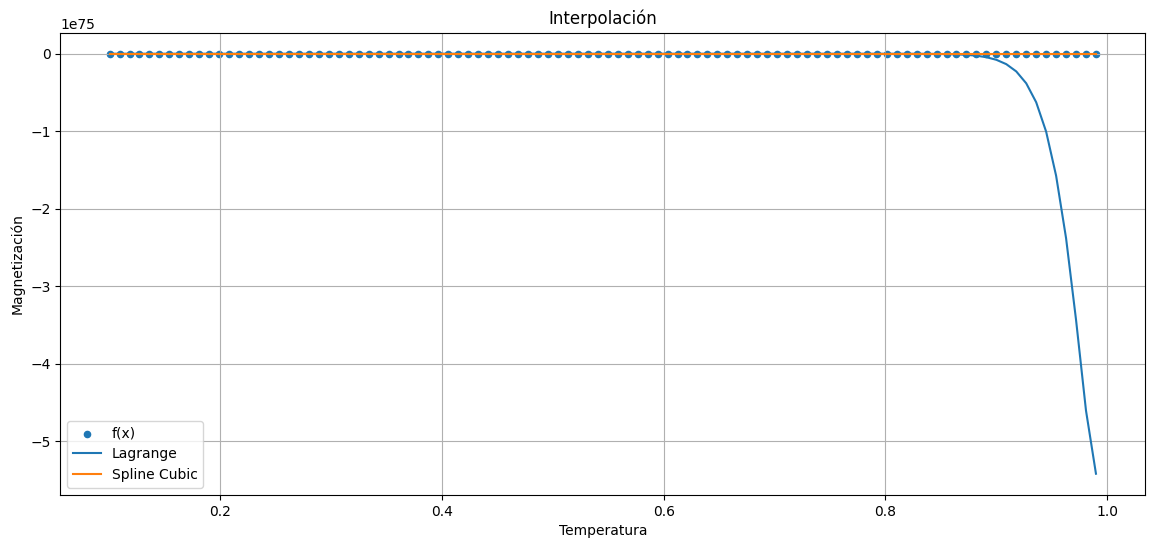

In [183]:
# Graficar los resultados
fig, ax = plt.subplots(figsize=(14, 6))

# Puntos de datos
ax.scatter(T, m, s=20, label='f(x)')
ax.plot(T, ma_l, label='Lagrange')
ax.plot(T, ma_s, label='Spline Cubic')

ax.set_title('Interpolación')
ax.set_xlabel('Temperatura')
ax.set_ylabel('Magnetización')
ax.legend()
plt.grid()
plt.show()

Entre ambos métodos de interpolación, el método de Spline Cubic es el que mejor se ajusta a los datos, pues el método de Lagrange al final tiene un cambio bastante pronunciado en su curva al final.